<H1>PRICE PREDICTION OF PRODUCTS: HACKEREARTH HACKATHON</H1><BR>SUBMISSION-2:LASSO <BR>NO GRID SEARCH<BR>VISUALS INCLUDED

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split


In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB
<class 'pandas.core.frame.Data

In [3]:
train_data.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  BRAE2NF6JA5GUEXG      37.0  2015-08-22 18:36:12.000                2   
1  TUNE8SFB6RJN2HSD      38.0  2016-03-27 21:19:13.000               24   
2  BRAEAR7WZPQGPBZU       9.0  2015-08-18 19:25:22.000              447   
3  WATDZ2ZQ8JPDHCTJ      50.0  2016-03-28 21:53:01.000               23   
4  JWSEBUKYQPMBZ3RK       7.0  2016-03-29 22:58:53.000               63   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0      Lillyann              Yes          Fashion      1      68   
1         Klynn              Yes          Fashion      0      51   
2         Ridge              Yes       Child_care      0      10   
3         Abran              Yes      Educational      2      48   
4        Dustyn              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  \
0             0.0      376.0           11.0         2983.0         4713.0   
1             0.0      397.0           12.0         7495.0        10352.0   
2             0.0      250.0            9.0         5752.0         7309.0   
3             0.0      144.0           13.0         5090.0        20814.0   
4             1.0      211.0            4.0         2430.0         9261.0   

   Selling_Price  
0    4185.947700  
1    9271.490256  
2    6785.701362  
3   13028.917824  
4     906.553935

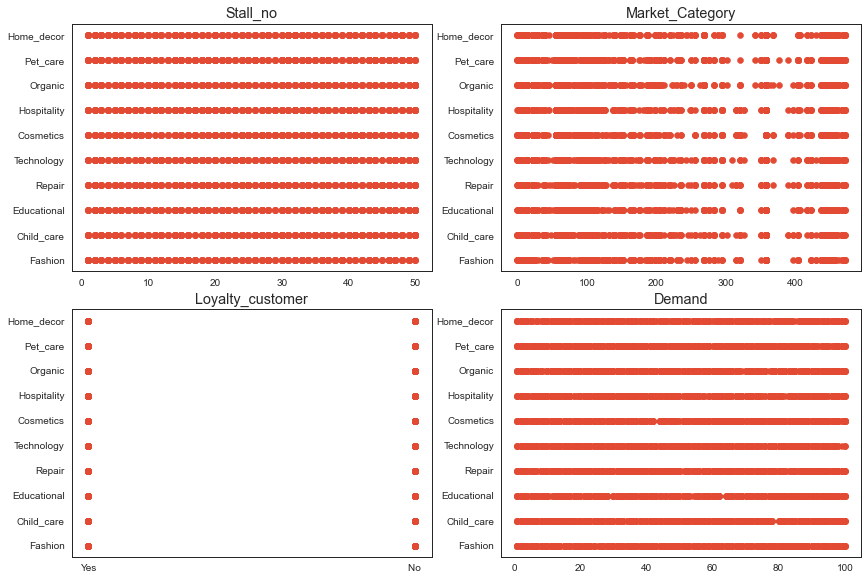

In [4]:
fig, saxis = plt.subplots(2,2)
saxis[0,0].scatter(x = "Stall_no", y = "Product_Category", data = train_data)
saxis[0,0].set_title('Stall_no')
saxis[0,1].scatter(x = "Market_Category", y = "Product_Category", data = train_data)
saxis[0,1].set_title('Market_Category')
saxis[1,0].scatter(x = train_data["Loyalty_customer"], y = train_data["Product_Category"])
saxis[1,0].set_title('Loyalty_customer')
saxis[1,1].scatter(x = train_data["Demand"], y = train_data["Product_Category"])
saxis[1,1].set_title('Demand')
fig.tight_layout(pad = 0.5)


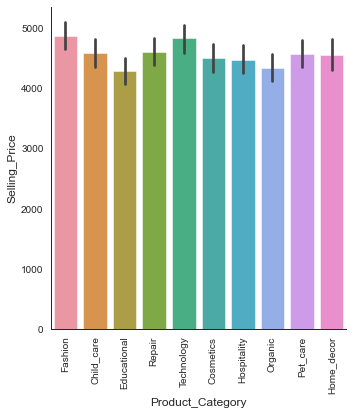

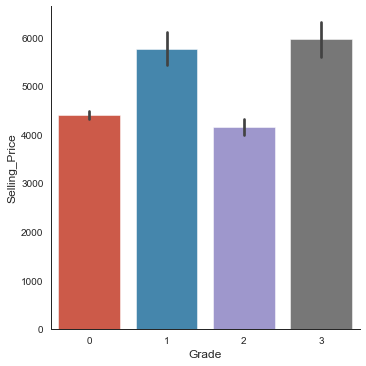

In [5]:
sns.catplot(x="Product_Category", y="Selling_Price", data=train_data, kind="bar").set_xticklabels(rotation = 90)
sns.catplot(x="Grade", y="Selling_Price",data=train_data,kind="bar")

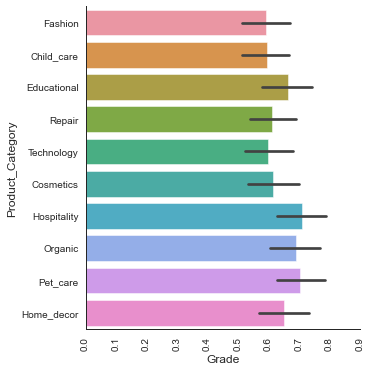

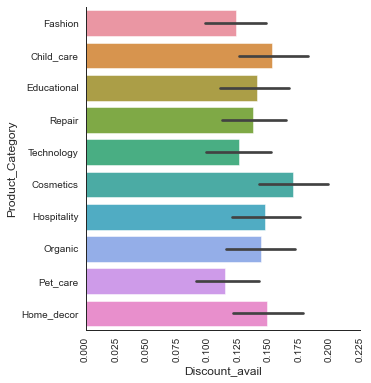

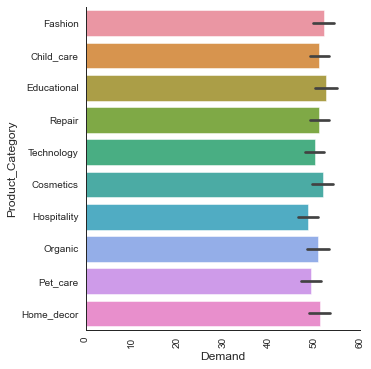

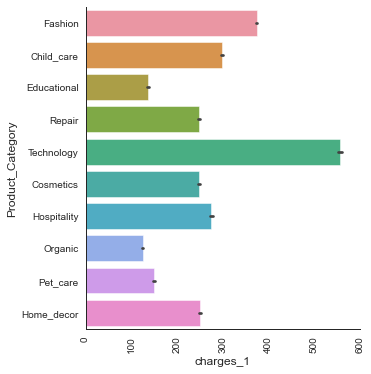

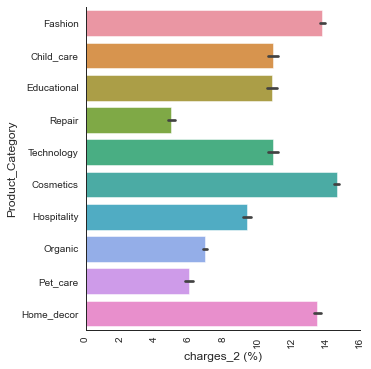

In [6]:
 sns.catplot(x = 'Grade', y = 'Product_Category', kind = "bar", data = train_data).set_xticklabels(rotation = 90)
 sns.catplot(x = 'Discount_avail', y = 'Product_Category', kind = "bar", data = train_data).set_xticklabels(rotation = 90)
 sns.catplot(x = 'Demand', y = 'Product_Category', kind = "bar", data = train_data).set_xticklabels(rotation = 90)
 sns.catplot(x = 'charges_1', y = 'Product_Category', kind = "bar", data = train_data).set_xticklabels(rotation = 90)
 sns.catplot(x = 'charges_2 (%)', y = 'Product_Category', kind = "bar", data = train_data).set_xticklabels(rotation = 90)

<AxesSubplot:xlabel='Product_Category', ylabel='Maximum_price'>

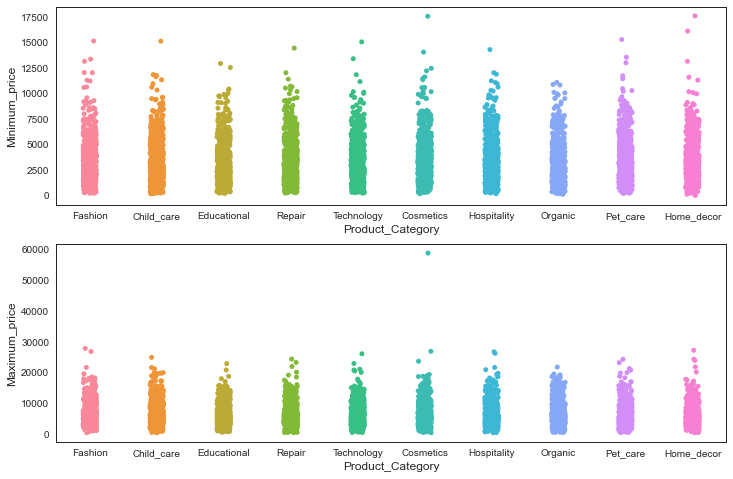

In [7]:
fig,(ax1,ax2) = plt.subplots(2)
sns.stripplot(x = 'Product_Category', y = 'Minimum_price', data = train_data, ax = ax1)
sns.stripplot(x = 'Product_Category', y = 'Maximum_price', data = train_data, ax = ax2)

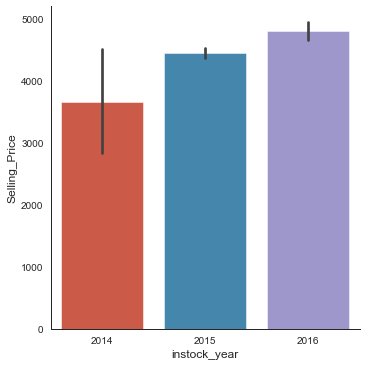

In [8]:
for data in [train_data, test_data]:
    data['instock_date'] = data['instock_date'].str.split(" ", n=1,expand = True)[0]
    data['instock_date'] = pd.to_datetime(data['instock_date'])
    data['instock_year'] = data['instock_date'].dt.year

sns.catplot(x = 'instock_year', y = 'Selling_Price',data = train_data, kind = "bar")

In [9]:
full_data = [train_data, test_data]
for data in full_data:
    data.drop(['Customer_name', 'Loyalty_customer','Stall_no', 'Market_Category', 'Demand','instock_date'], inplace = True, axis = 1)
    
Product_Category_encoded = pd.get_dummies(train_data['Product_Category'])
train_data = pd.concat([train_data,Product_Category_encoded], axis = 1)
Product_Category_encoded = pd.get_dummies(test_data['Product_Category'])
test_data = pd.concat([test_data,Product_Category_encoded], axis = 1)
train_data.head()

Product_id Product_Category  Grade  Discount_avail  charges_1  \
0  BRAE2NF6JA5GUEXG          Fashion      1             0.0      376.0   
1  TUNE8SFB6RJN2HSD          Fashion      0             0.0      397.0   
2  BRAEAR7WZPQGPBZU       Child_care      0             0.0      250.0   
3  WATDZ2ZQ8JPDHCTJ      Educational      2             0.0      144.0   
4  JWSEBUKYQPMBZ3RK           Repair      1             1.0      211.0   

   charges_2 (%)  Minimum_price  Maximum_price  Selling_Price  instock_year  \
0           11.0         2983.0         4713.0    4185.947700          2015   
1           12.0         7495.0        10352.0    9271.490256          2016   
2            9.0         5752.0         7309.0    6785.701362          2015   
3           13.0         5090.0        20814.0   13028.917824          2016   
4            4.0         2430.0         9261.0     906.553935          2016   

   Child_care  Cosmetics  Educational  Fashion  Home_decor  Hospitality  \
0           0          0            0        1           0            0   
1           0          0            0        1           0            0   
2           1          0            0        0           0            0   
3           0          0            1        0           0            0   
4           0          0            0        0           0            0   

   Organic  Pet_care  Repair  Technology  
0        0         0       0           0  
1        0         0       0           0  
2        0         0       0           0  
3        0         0       0           0  
4        0         0       1           0

In [10]:
for data in full_data:
    for x in data.columns:
        print("{col} : {val}".format(col = x, val = data[x].isna().sum()))
    print('-'*30)

listProd = ['Child_care','Cosmetics', 'Educational','Fashion','Home_decor',	'Hospitality',	'Organic',	'Pet_care',	'Repair','Technology']
nullCols = ['Discount_avail','charges_1','charges_2 (%)','Minimum_price','Maximum_price']
for data in full_data:
    for y in nullCols:
        print(y)
        for x in listProd:
            print('{col}:  {val}'.format(col = x, val=(data['Product_Category'].loc[data[y].isna()] ==x).sum()))
        print('----------------------')
    print('=========================')




Product_id : 0
Product_Category : 0
Grade : 0
Discount_avail : 38
charges_1 : 198
charges_2 (%) : 205
Minimum_price : 38
Maximum_price : 343
Selling_Price : 41
instock_year : 0
------------------------------
Product_id : 0
Product_Category : 0
Grade : 0
Discount_avail : 0
charges_1 : 36
charges_2 (%) : 5
Minimum_price : 14
Maximum_price : 0
instock_year : 0
------------------------------
Discount_avail
Child_care:  6
Cosmetics:  2
Educational:  5
Fashion:  4
Home_decor:  5
Hospitality:  6
Organic:  2
Pet_care:  0
Repair:  6
Technology:  2
----------------------
charges_1
Child_care:  18
Cosmetics:  14
Educational:  17
Fashion:  25
Home_decor:  29
Hospitality:  22
Organic:  13
Pet_care:  15
Repair:  23
Technology:  22
----------------------
charges_2 (%)
Child_care:  20
Cosmetics:  26
Educational:  16
Fashion:  19
Home_decor:  22
Hospitality:  23
Organic:  23
Pet_care:  22
Repair:  23
Technology:  11
----------------------
Minimum_price
Child_care:  2
Cosmetics:  2
Educational:  5
Fashi

In [11]:

data_full = [train_data,test_data]
for data in data_full:
    for y in ['Discount_avail','charges_1','charges_2 (%)','Minimum_price','Maximum_price']:
        for x in ['Child_care','Cosmetics', 'Educational','Fashion','Home_decor',	'Hospitality',	'Organic',	'Pet_care','Repair','Technology']:
            mean = data.loc[(data[y] > 0) & (train_data['Product_Category'] == x), y].mean()
            data.loc[(data[y].isna()) & (data['Product_Category'] == x), y] = mean
            print(mean)
        print (data[y].isna().sum())
    print("="*30)

data = train_data
y = 'Selling_Price'
for x in ['Child_care','Cosmetics', 'Educational','Fashion','Home_decor',	'Hospitality',	'Organic',	'Pet_care','Repair','Technology']:
       mean = data.loc[(data[y] > 0) & (train_data['Product_Category'] == x), y].mean()
       data.loc[(data[y].isna()) & (data['Product_Category'] == x), y] = mean
       print(mean)
print (data[y].isna().sum())
print("Total Null Values in the training dataset = {val}".format(val = train_data.isna().sum() ))
print("Total Null Values in the testing dataset = {val}".format(val = test_data.isna().sum() ))
   

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0
298.6828125
248.92598425196852
135.96964586846542
374.43696027633854
250.85544217687075
274.77868852459017
124.66227347611202
150.3433283358321
247.7488514548239
556.1053511705686
0
10.938871473354231
14.669341894060995
10.877104377104377
13.822222222222223
13.53109243697479
9.399014778325123
6.971524288107203
6.054545454545455
4.989280245022971
10.960591133004925
0
3565.2591463414633
3582.3137557959813
3411.1355371900827
3583.6976744186045
3534.022838499184
3496.831746031746
3396.6013071895427
3604.626843657817
3557.6140089418777
3565.8733766233768
0
6556.631493506494
6601.755267423015
6134.445217391304
6558.836267605634
6448.645762711864
6452.817420435511
6355.725752508361
6436.376722817764
6477.858490566037
6279.246956521739
0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0
267.4254658385093
265.88338192419826
259.43913532863417
264.6269113149847
268.2012332343145
255.8467158291888
270.0592234110982
265.9632402153553
270.48116344752185
265.7508739

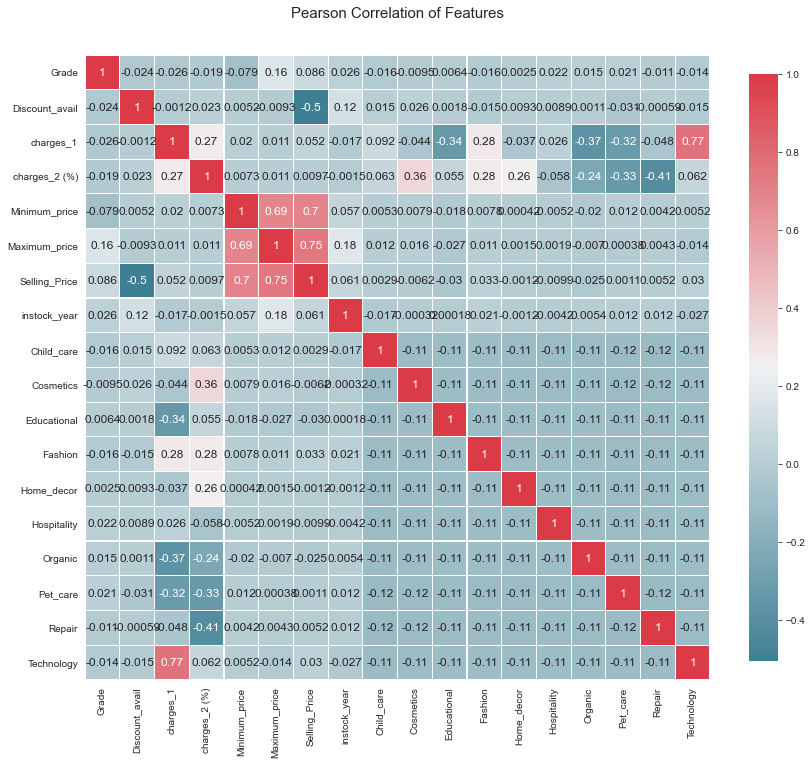

In [12]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_data)

In [13]:
train_data = train_data[train_data['Selling_Price']>0]
features = ['Grade', 'Discount_avail',
       'charges_1', 'charges_2 (%)', 'Minimum_price', 'Maximum_price',
       'instock_year', 'Child_care', 'Cosmetics',
       'Educational', 'Fashion', 'Home_decor', 'Hospitality', 'Organic',
       'Pet_care', 'Repair', 'Technology']
X = train_data[features]
y = train_data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [14]:
from sklearn.metrics import mean_squared_log_error
def RMSLE(y_true:np.ndarray, y_pred:np.ndarray) -> np.float64:
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [30]:
from sklearn.linear_model import Lasso
model = Lasso()
results = model.fit(X_train, y_train)
predictions = results.predict(X_test)
data = {'y_test': y_test, 'predictions' : predictions}
df = pd.DataFrame(data,columns=['y_test','predictions'])
df = df[df['predictions']>0]
RMSLE(df['y_test'],df['predictions'])

0.3270025432653567

In [25]:
features = ['Grade', 'Discount_avail',
       'charges_1', 'charges_2 (%)', 'Minimum_price', 'Maximum_price',
       'instock_year', 'Child_care', 'Cosmetics',
       'Educational', 'Fashion', 'Home_decor', 'Hospitality', 'Organic',
       'Pet_care', 'Repair', 'Technology']
x = test_data[features]
predictions_test = lin_reg.predict(x)

In [26]:
test_data['Selling_Price'] = predictions_test
data = {'Product_id':test_data['Product_id'], 'Selling_Price':test_data['Selling_Price']}
submissions_df = pd.DataFrame(data= data, columns = ['Product_id', 'Selling_Price'])

In [27]:
submissions_df.to_csv(path_or_buf='/Users/username/Desktop/price-pred/submission.csv')